In [160]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [161]:
import warnings as ws
ws.defaultaction = "ignore"

In [162]:
print("lets get started")

lets get started


In [163]:
frame  = pd.read_csv("handson-ml2/datasets/housing/housing.csv")

In [164]:
frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [165]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [166]:
# First-stage conclusion :-  column total_bedrooms contains null values
# ocean_proximity - is object type

In [167]:
frame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


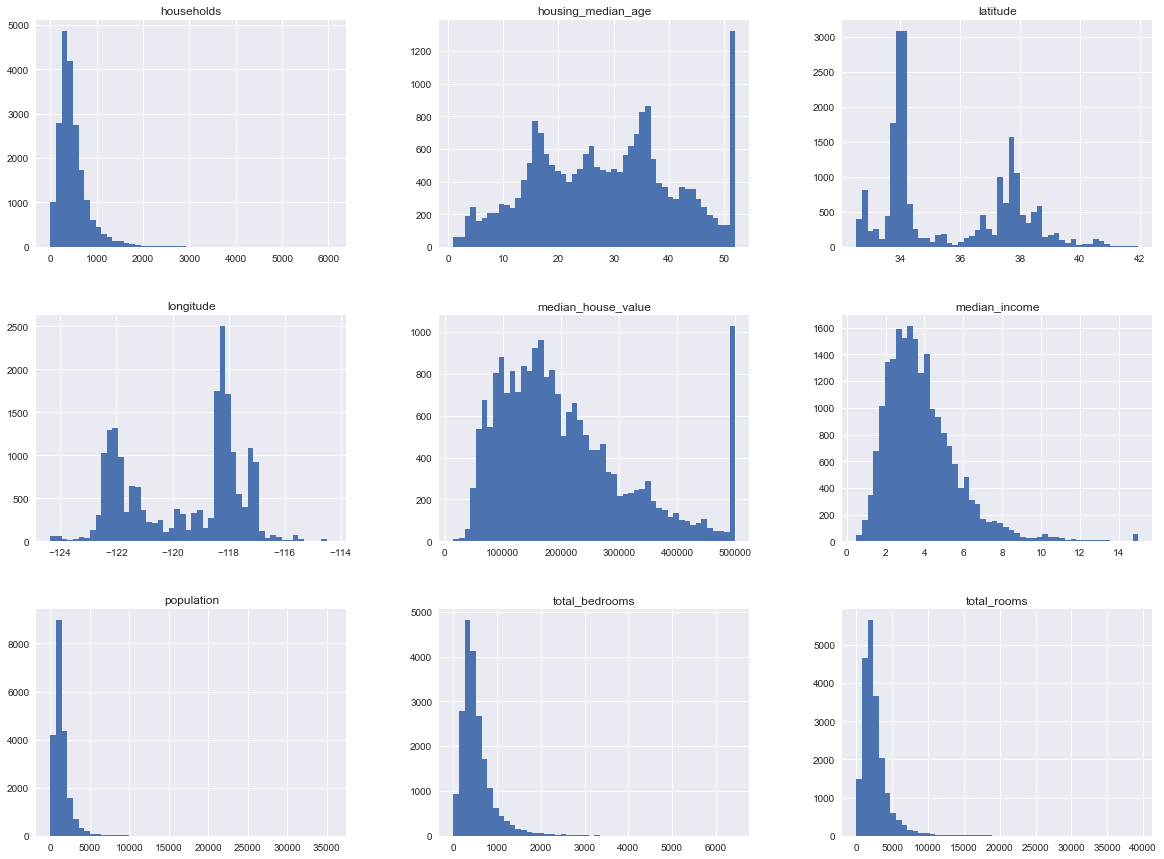

In [168]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
frame.hist(bins = 50, figsize=(20,15))
plt.show()

In [169]:
# The multiple values are scaled to the multiple scales 
# The median income is scaled on the other scale

#### Finally, many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

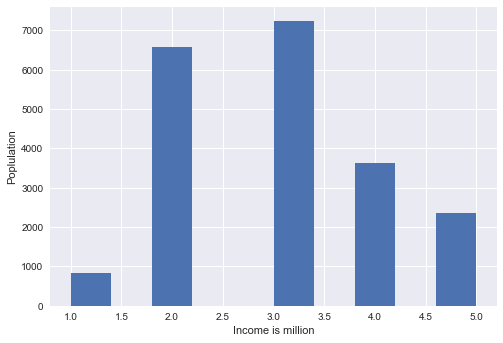

In [170]:
frame["income_cat"] = pd.cut(frame["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
plt.xlabel("Income is million")
plt.ylabel("Poplulation")
_ , _, _ = plt.hist(frame.income_cat)

Text(0.5, 1.0, 'The longitude to latitude ratio')

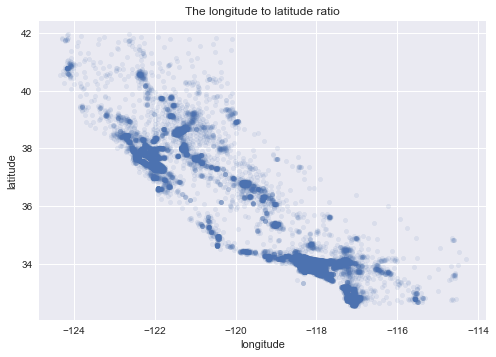

In [171]:
frame.plot(kind="scatter", x="longitude", y="latitude", alpha= 0.1)
plt.title("The longitude to latitude ratio")

In [172]:
print("starting the data pract")

starting the data pract


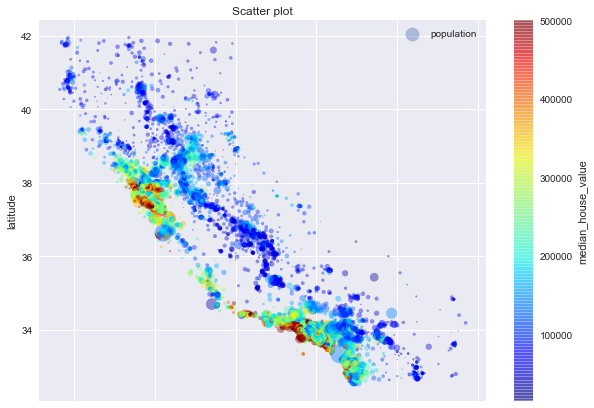

In [173]:
frame.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=frame["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.title("Scatter plot")
plt.legend()

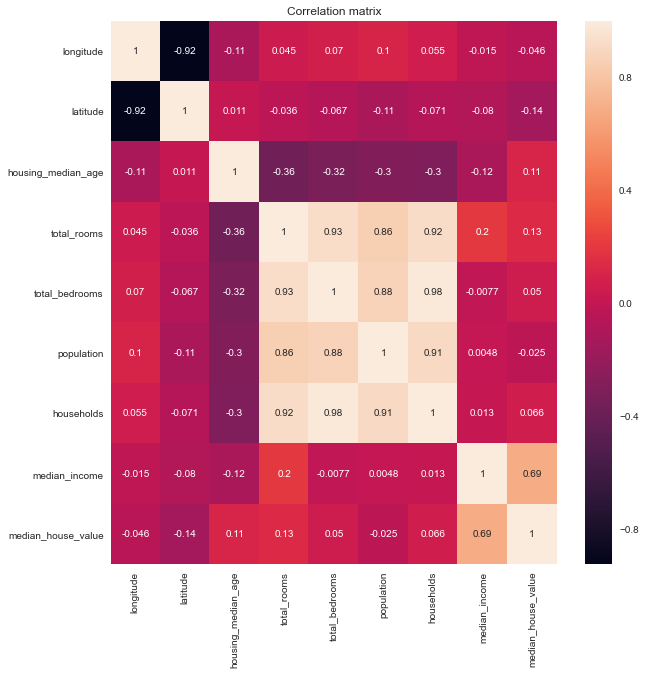

In [174]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
_ = sns.heatmap(frame.corr(), annot=True)
_ = plt.title("Correlation matrix")

##### The correlation coefficient only measures linear correlations 
#####  It may completely miss out on nonlinear relationships 

In [175]:
frame.corr()["median_house_value"]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

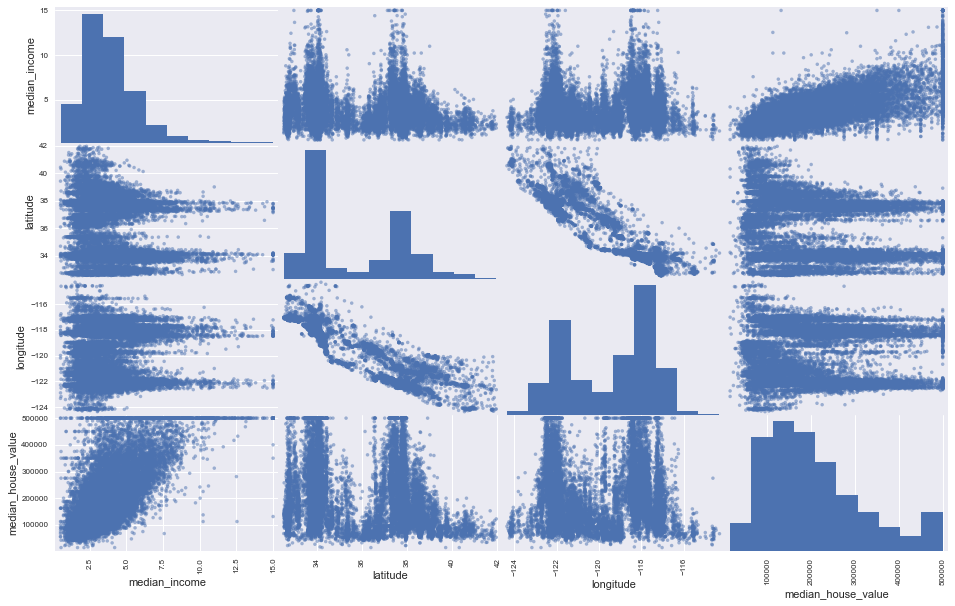

In [176]:
from pandas.plotting import scatter_matrix
attrib = ["median_income", "latitude", "longitude", "median_house_value"]
scatter_matrix(frame[attrib],figsize=(16,10))
plt.show()

In [177]:
# From the above graphs we can conclude that the median_income is positively and strongly correlated with the target attribute

In [178]:
# Drawing the scattered plot

In [179]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Median house value')

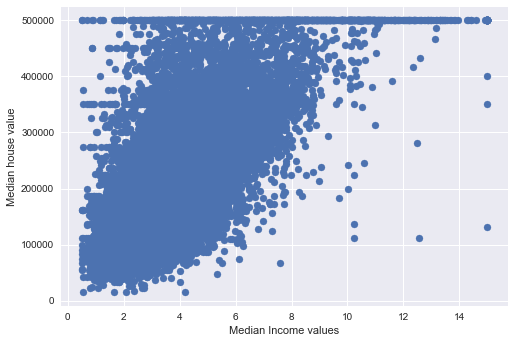

In [180]:
plt.scatter(x = frame.median_income, y = frame.median_house_value)
plt.xlabel("Median Income values")
plt.ylabel("Median house value")

In [181]:
frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [182]:
frame.ocean_proximity.values

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

In [183]:
frame.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [184]:
frame.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
income_cat              0
dtype: int64

In [185]:
frame["rooms_per_household"] = frame.total_rooms/frame.households
frame["total_bedrooms_per_household"]  = frame.total_bedrooms/frame.households

In [186]:
frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,total_bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,1.081081


In [187]:
frame.isnull().sum()

longitude                         0
latitude                          0
housing_median_age                0
total_rooms                       0
total_bedrooms                  207
population                        0
households                        0
median_income                     0
median_house_value                0
ocean_proximity                   0
income_cat                        0
rooms_per_household               0
total_bedrooms_per_household    207
dtype: int64

In [188]:
# If we calculated the calculations or derivations using the column containing the Null values then it is 
# obevious that the  dependent column is also going to be full of NA Values
# See in above table

In [189]:
correlation_matrix = frame.corr()

In [190]:
correlation_matrix["median_house_value"]

longitude                      -0.045967
latitude                       -0.144160
housing_median_age              0.105623
total_rooms                     0.134153
total_bedrooms                  0.049686
population                     -0.024650
households                      0.065843
median_income                   0.688075
median_house_value              1.000000
rooms_per_household             0.151948
total_bedrooms_per_household   -0.046739
Name: median_house_value, dtype: float64

#####  Form the above correlation table we can clearly state that the correlation coefficient between the derived columns and the target value 
##### is quite good to goo 

# Prepare the Data for Machine Learning Algorithms

In [191]:
# Most Machine Learning algorithms cannot work with missing features
# For handeling missing values we are going to use the SimpleImputer

In [192]:
from sklearn.impute import SimpleImputer
simp = SimpleImputer(strategy="median")

In [193]:
# Since the median is only caluculataed on the numerical values we are dropping the columns occean_proximity
numerical_frame = frame.drop(["ocean_proximity", "median_house_value"],  axis = 1) 
labels = frame["median_house_value"].copy()

In [194]:
# All features are numeric
numerical_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,total_bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,5,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,5,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,5,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,6.281853,1.081081


In [195]:
# For numerical data calculating the values 
simp.fit(numerical_frame)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [196]:
simp.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        3.00000000e+00,  5.22912879e+00,  1.04888889e+00])

In [197]:
# This will generate the median of each column and store it in the statistics

In [198]:
len(numerical_frame.columns)

11

In [199]:
X = simp.transform(numerical_frame)
imputed_num_df = pd.DataFrame(X, columns=numerical_frame.columns, index=numerical_frame.index)

In [200]:
imputed_num_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms_per_household,total_bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,5.0,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,5.0,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,5.0,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4.0,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3.0,6.281853,1.081081


In [201]:
imputed_num_df.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                  0
population                      0
households                      0
median_income                   0
income_cat                      0
rooms_per_household             0
total_bedrooms_per_household    0
dtype: int64

####  As we can see here the null values are replace by the median values

In [202]:
# old numerical frame
numerical_frame.total_bedrooms.isnull().sum()

207

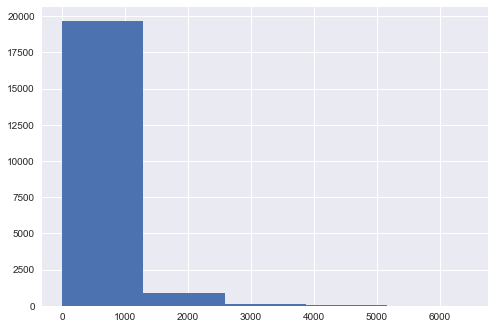

In [203]:
_ , _ , _ = plt.hist(imputed_num_df.total_bedrooms, bins=5)

## Handling Text and Categorical Attributes

In [204]:
frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,total_bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,1.081081


In [205]:
# When we need the 2-d  numpy array for the furthur computationg we have to extract values as 
cat_feat = frame[["ocean_proximity"]]

In [206]:
cat_feat.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [207]:
cat_feat.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [208]:
cat_feat.ocean_proximity.values

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

### It’s not arbitrary text: there are a limited number of possible values, each of which represents a category.

In [209]:
# For exploration
from sklearn.preprocessing import OrdinalEncoder
ord_encode = OrdinalEncoder()
encode_ordinal = ord_encode.fit_transform(cat_feat)
encode_ordinal

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [210]:
ord_encode.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### For the implementation of the ordinal catagories like  low, medium and high we can use the ordinal encode because it assign the values as per importance. but in out example we can't use this because all the values in our column are on the same scale 

In [211]:
# We are using the one-hot encoding

In [212]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encode = OneHotEncoder()
one_hot_encoded_data = one_hot_encode.fit_transform(cat_feat)
one_hot_encoded_data

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [213]:
one_hot_encode.categorical_features

In [214]:
one_hot_encode.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [215]:
#  Convertingt sparse matrix to array 
one_hot_encoded_data = one_hot_encoded_data.toarray()

In [216]:
one_hot_encoded_data

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [217]:
one_hot_encode_frame = pd.DataFrame(one_hot_encoded_data, columns=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'])
one_hot_encode_frame.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [218]:
pd.get_dummies(cat_feat).astype(np.float).head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [219]:
# WE can also use the custom transformer by creating the custom transformer classes

# Feature Scaling
#### With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.   For scaling we can use the two transformation

### * Min - Max scaling :-
##### The valus are scaled to the range of ( 0 -1 ) we can also change this range to anything we want
### * Standerdization :-
##### The values are standerdized to any range it is not bounded to range (0-1) this is less significant to the outlier

In [220]:
# Making the pipeline of the various function 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [221]:
# For adding Custom features we are using the Custom Transformer

In [222]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
frame1 = attr_adder.transform(frame.values)

In [223]:
num_pipline = Pipeline(
[
    ('imputing_values', SimpleImputer(strategy ="median")),
    ('arrtib_adder', CombinedAttributesAdder()),
    ('scaling', StandardScaler())
] 
)
piplined_data = num_pipline.fit_transform(numerical_frame)

In [224]:
piplined_data.shape

(20640, 14)

In [225]:
# Handeling the numerical and catagorial variable at once

In [226]:
from sklearn.compose import ColumnTransformer
numerical_attrib = list(numerical_frame)
catagorial_attrib = ["ocean_proximity"]

In [227]:
# Transforming the all features i.e. numerical and  catagorial variable all at once using the single pipline

full_pipeline = ColumnTransformer([
    ("num", num_pipline, numerical_attrib),
    ("cat", OneHotEncoder(), catagorial_attrib)
])


In [228]:
df = pd.read_csv("handson-ml2/datasets/housing/housing.csv")

In [229]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [230]:
numerical_frame.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'income_cat', 'rooms_per_household', 'total_bedrooms_per_household'],
      dtype='object')

In [231]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [232]:
df['income_cat'] = numerical_frame.income_cat
df['rooms_per_household'] = numerical_frame.rooms_per_household
df['total_bedrooms_per_household']  = numerical_frame.total_bedrooms_per_household

In [234]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,total_bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3,6.281853,1.081081


In [235]:
len(df.columns)

13

In [236]:
full_piplined_data = full_pipeline.fit_transform(df)

In [237]:
full_piplined_data.shape

(20640, 19)

In [238]:
full_pipeline.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputing_values',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('arrtib_adder',
                                                  CombinedAttributesAdder(add_bedrooms_per_room=True)),
                    

#####  This is complete data prepreocessing pipeline

In [242]:
# Selection and training a model
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(full_piplined_data, labels, test_size = 0.2, random_state = 42 )

In [244]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 19)
(4128, 19)
(16512,)
(4128,)


In [245]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [246]:
y_pred = linear.predict(X_test)

In [251]:
from sklearn.metrics import mean_squared_error
print("Baseline MSE score is ", np.sqrt(mean_squared_error(y_test, y_pred)))

Baseline MSE score is  74680.16345897388


#### This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions

In [ ]:
# on the basis of the model scoring  we have to choose the better model